In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv('data/AmesHousing.csv')
pd.set_option('display.max_columns', None)

# Ver las primeras filas
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df=df.drop(['Order'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [6]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
House Style        8
Functional         8
Roof Matl          8
Condition 2        8
MS Zoning          7
Roof Style         6
BsmtFin Type 1     6
Sale Condition     6
Heating            6
Foundation         6
Garage Type        6
BsmtFin Type 2     6
Lot Config         5
Kitchen Qual       5
Misc Feature       5
Garage Cond        5
Garage Qual        5
Exter Cond         5
Fireplace Qu       5
Bsmt Cond          5
Bldg Type          5
Bsmt Qual          5
Heating QC         5
Electrical         5
Bsmt Exposure      4
Exter Qual         4
Land Contour       4
Lot Shape          4
Mas Vnr Type       4
Pool QC            4
Fence              4
Garage Finish      3
Land Slope         3
Utilities          3
Paved Drive        3
Alley              2
Street             2
Central Air        2
dtype: int64

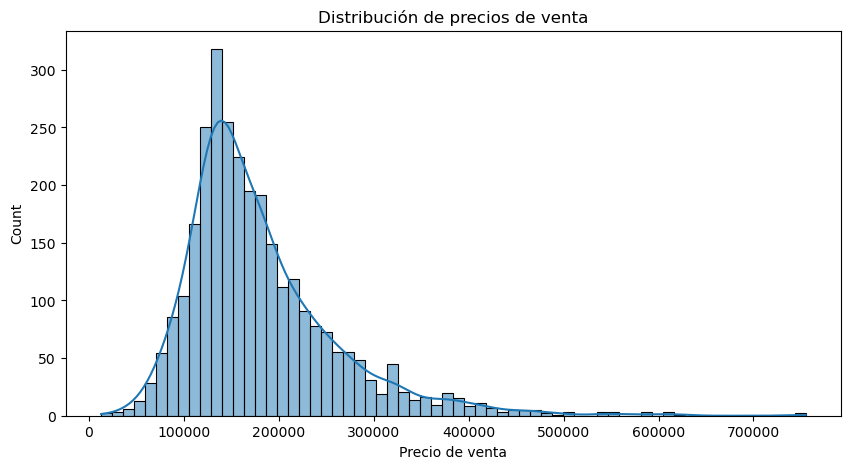

In [7]:
# Visualizar la distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribución de precios de venta")
plt.xlabel("Precio de venta")
plt.show()



In [8]:
# Ver si hay outliers fuertes
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

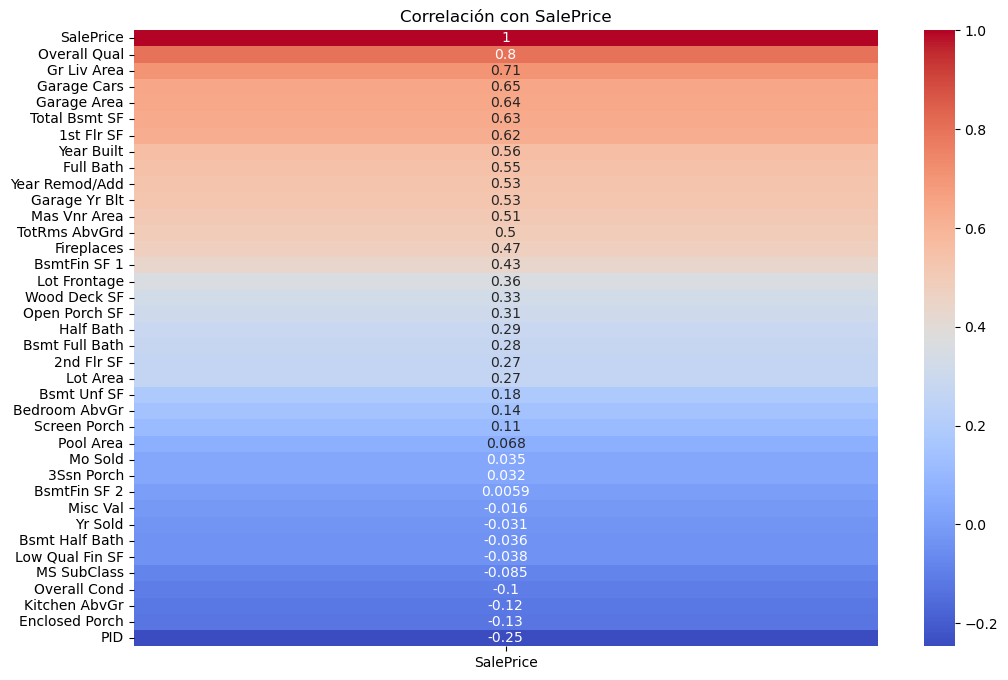

In [9]:
# Matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Mostrar las más correlacionadas con el precio
corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación con SalePrice")
plt.show()

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

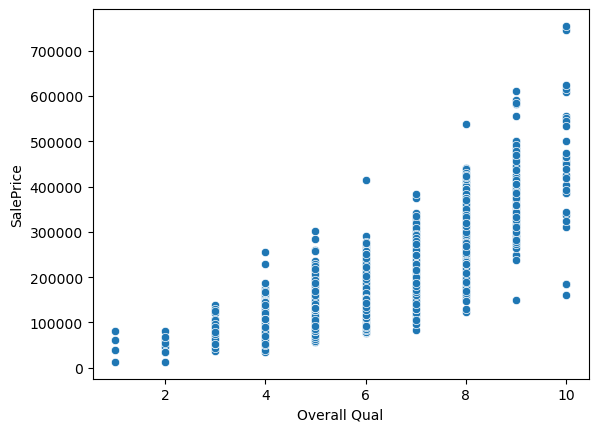

In [10]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [11]:
# Ver cantidad de nulos por columna
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(30)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64

In [12]:
# Eliminar columnas con muchos valores nulos (más del 50%)
missing_percent = (df.isnull().sum() / len(df)) * 100
cols_to_drop = missing_percent[missing_percent > 50].index.tolist()

print(f"Columnas a eliminar (más del 50% de nulos): {cols_to_drop}")
print(f"Total de columnas a eliminar: {len(cols_to_drop)}")
print(f"\nPorcentaje de nulos en estas columnas:")
print(missing_percent[missing_percent > 50])

# Eliminar las columnas
df = df.drop(columns=cols_to_drop)

print(f"\nShape después de eliminar columnas: {df.shape}")


Columnas a eliminar (más del 50% de nulos): ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']
Total de columnas a eliminar: 5

Porcentaje de nulos en estas columnas:
Alley           93.242321
Mas Vnr Type    60.580205
Pool QC         99.556314
Fence           80.477816
Misc Feature    96.382253
dtype: float64

Shape después de eliminar columnas: (2930, 76)


Límites para SalePrice:
Q1: 129500.00
Q3: 213500.00
IQR: 84000.00
Límite inferior: 3500.00
Límite superior: 339500.00

Número de outliers encontrados: 137


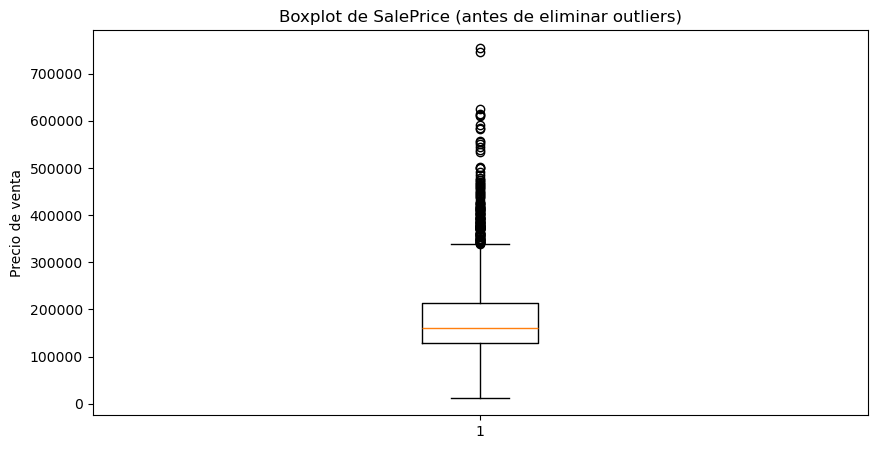


Shape después de eliminar outliers: (2793, 76)
Registros eliminados: 137


In [13]:
# Detectar y eliminar outliers usando el método IQR
# Primero, identificamos outliers en la variable target (SalePrice)
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límites para SalePrice:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

# Identificar outliers
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(f"\nNúmero de outliers encontrados: {len(outliers)}")

# Visualizar los outliers
plt.figure(figsize=(10, 5))
plt.boxplot(df['SalePrice'])
plt.title("Boxplot de SalePrice (antes de eliminar outliers)")
plt.ylabel("Precio de venta")
plt.show()

# Eliminar outliers
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
print(f"\nShape después de eliminar outliers: {df.shape}")
print(f"Registros eliminados: {len(outliers)}")


In [14]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numéricas: imputar con mediana + escalar
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categóricas: imputar con 'missing' + OneHot
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos ambas
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
# Ajustar al conjunto de entrenamiento y transformar ambos
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar el modelo
lr = LinearRegression()
lr.fit(X_train_prep, y_train)

# Predecir
y_pred_lr = lr.predict(X_test_prep)

# Evaluación
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

Linear Regression:
MAE: 13564.57
RMSE: 25709.06
R²: 0.8223


In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_prep, y_train)
y_pred_ridge = ridge.predict(X_test_prep)

print("\nRidge Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 2))
print("R²:", round(r2_score(y_test, y_pred_ridge), 4))


Ridge Regression:
MAE: 13744.36
RMSE: 23829.23
R²: 0.8473


In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0, max_iter=5000)  # Aumentado de 1000 (default) a 5000
lasso.fit(X_train_prep, y_train)
y_pred_lasso = lasso.predict(X_test_prep)

print("\nLasso Regression:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_lasso), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 2))
print("R²:", round(r2_score(y_test, y_pred_lasso), 4))


Lasso Regression:
MAE: 13313.86
RMSE: 25105.97
R²: 0.8305
